In [1]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from utils import *
from ardca import *
from classes import *

In [2]:
N_SEQ = 5000
msa_path = "../data/PF00014.fasta.gz"
model_path = "models/ardca_PF00014_v0.pt"

In [3]:
alignment = read_fasta_alignment(msa_path, max_gap_fraction=1.0)
model = load_ardca_model(model_path)

# PCA on MSA Sequences vs Model Generated Sequences

In [4]:
# perfom pca on MSA
alignment2d, _ = pca_from_onehot(alignment)

# sample N_SEQ from the PCA
random_indices = np.random.choice(alignment2d.shape[0], size=N_SEQ, replace=False)
random_msa_samples = alignment2d[random_indices]

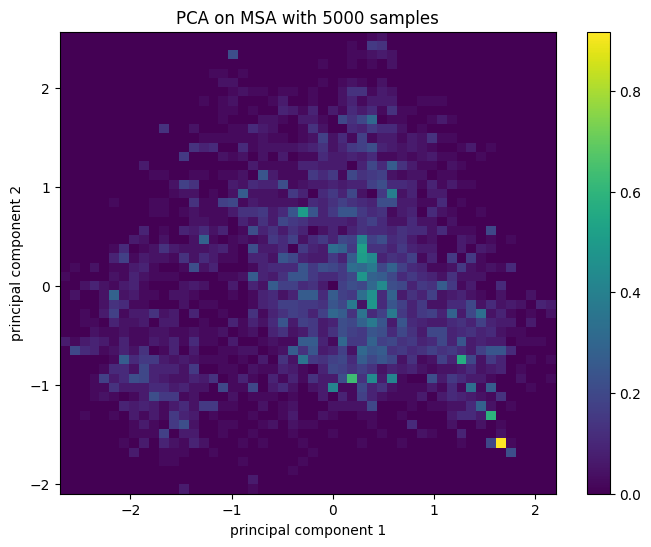

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
h = ax.hist2d(
    random_msa_samples[:, 0],
    random_msa_samples[:, 1],
    bins=50,
    density=True,
)

ax.set(
    title=f"PCA on MSA with {N_SEQ} samples",
    xlabel="principal component 1",
    ylabel="principal component 2",
)

plt.colorbar(h[3], ax=ax)
plt.savefig("out/PCA_DATA")

In [6]:
# sample sequences from model
generated_seqs = model.sample_sequences(n_samples=N_SEQ, seed=42).numpy()

In [7]:
# perform pca on the model
pca_generated, _ = pca_from_onehot(generated_seqs)

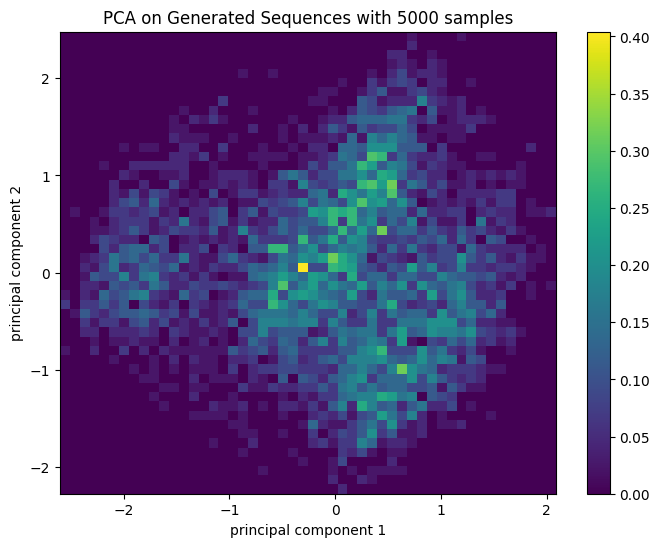

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
h = ax.hist2d(
    pca_generated[:, 0],
    pca_generated[:, 1],
    bins=50,
    density=True,
)

ax.set(
    title=f"PCA on Generated Sequences with {N_SEQ} samples",
    xlabel="principal component 1",
    ylabel="principal component 2",
)

plt.colorbar(h[3], ax=ax)
plt.savefig("out/PCA_MODEL")

# UMAP

/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


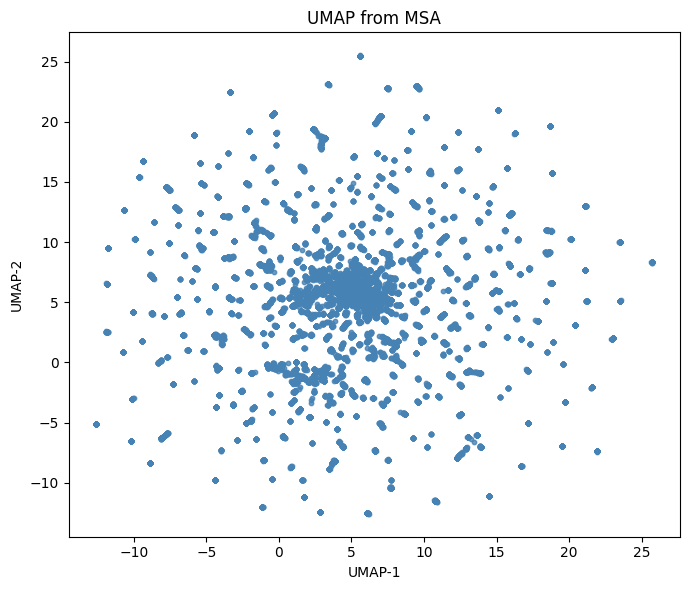

In [9]:
# perform umap on alignment
alignment_umap, _ = umap_from_onehot(alignment, n_components=2)
plt.figure(figsize=(7, 6))
plt.scatter(alignment_umap[:, 0], alignment_umap[:, 1], s=10, alpha=0.8, color="steelblue")

plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP from MSA")
plt.tight_layout()
plt.savefig("out/UMAP_DATA")

/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


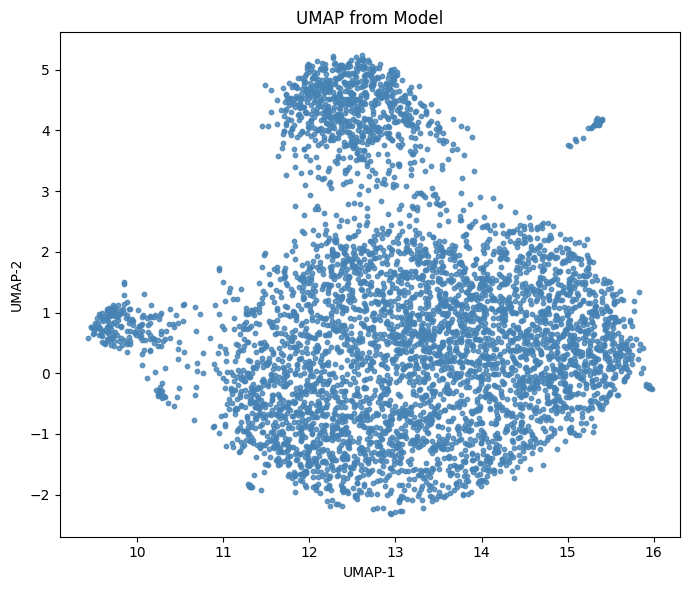

In [10]:
# perform umap on model
generated_umap, _ = umap_from_onehot(generated_seqs, n_components=2)

plt.figure(figsize=(7, 6))
plt.scatter(generated_umap[:, 0], generated_umap[:, 1], s=10, alpha=0.8, color="steelblue")

plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP from Model")
plt.tight_layout()
plt.savefig("out/UMAP_MODEL")

# Hamming Distance Matrix

/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an un

<Figure size 1200x1000 with 0 Axes>

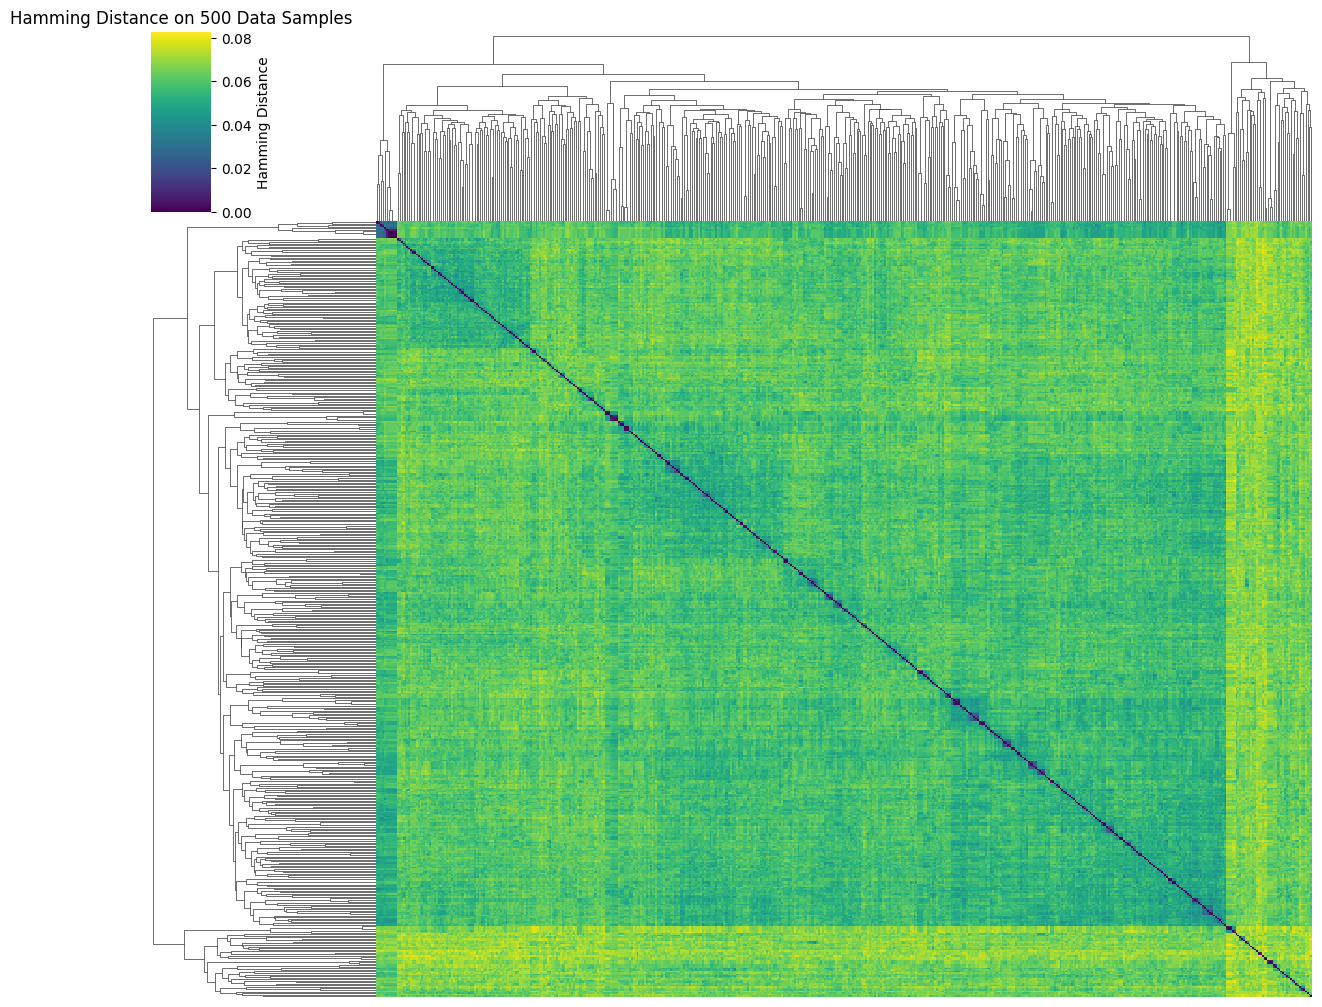

In [11]:
N_SEQ = 500

random_indices = np.random.choice(alignment.shape[0], size=N_SEQ, replace=False)
msa_samples = alignment[random_indices]

X = one_hot_for_pca(msa_samples)
dist_matrix = pairwise_distances(X, metric="hamming")

plt.figure(figsize=(12, 10))
cluster_grid = sns.clustermap(
    dist_matrix,
    cmap="viridis",
    figsize=(12, 10),
    method="average",  # Use average linkage for clustering
    xticklabels=False, # Hide x-axis labels
    yticklabels=False, # Hide y-axis labels
    cbar_kws={"label": "Hamming Distance"}
)
plt.title(f"Hamming Distance on {N_SEQ} Data Samples")
plt.savefig("out/HD_DATA")

/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/tommasoferracina/bocconi/thesis/ArDCA-Python/code/.arvenv/lib/python3.13/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an un

<Figure size 1200x1000 with 0 Axes>

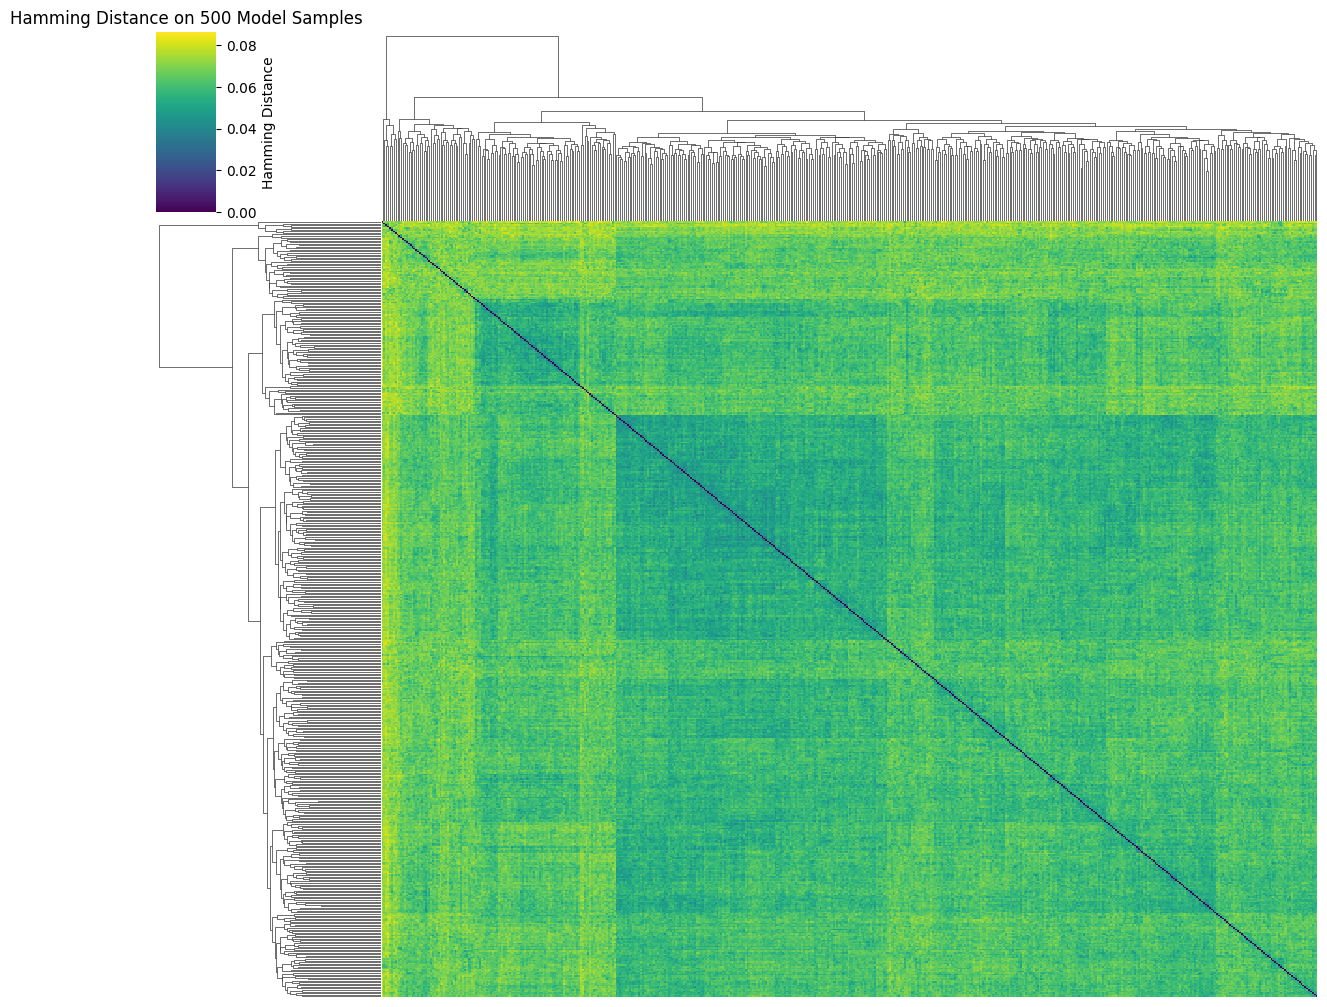

In [12]:
generated_seqs = model.sample_sequences(n_samples=N_SEQ, seed=42).numpy()
Y = one_hot_for_pca(generated_seqs)
dist_matrix = pairwise_distances(Y, metric="hamming")

plt.figure(figsize=(12, 10))
cluster_grid = sns.clustermap(
    dist_matrix,
    cmap="viridis",
    figsize=(12, 10),
    method="average",  # Use average linkage for clustering
    xticklabels=False, # Hide x-axis labels
    yticklabels=False, # Hide y-axis labels
    cbar_kws={"label": "Hamming Distance"}
)
plt.title(f"Hamming Distance on {N_SEQ} Model Samples")
plt.savefig("out/HD_MODEL")

# One-, Two-, & Three-Site Connected Correlation

In [13]:
generated_seqs = model.sample_sequences(n_samples=10000, seed=42).numpy()

W, M_eff = compute_weights_blockwise(X_idx=alignment, theta=0.8, gap_idx=0)

model_weights = np.ones(len(generated_seqs))
model_M_eff = float(len(generated_seqs))

In [ ]:
# Run comprehensive analysis
results = comprehensive_correlation_analysis(
    alignment, 
    generated_seqs,
    W,
    M_eff,
    model_weights,
    model_M_eff,
    q=q,
    max_triplets=200
)

# Print summary statistics
print(f"Single-site correlation: {results['single_site_freqs']['pearson']:.3f}")
print(f"Two-site correlation: {results['two_site_corrs']['pearson']:.3f}")
print(f"Three-site correlation: {results['three_site_corrs']['pearson']:.3f}")